# Res-Net 
## Author - Avineil Jain 
This notebook illustrates the Res-Net architecture given in the paper Deep Residual Learning for Image Recognition. The code is done in Python using Keras with Tensorflow backend. Even though Res-Nets work best for very deep networks, shallow networks will be trained here due to computation limitations

In [6]:
import tensorflow as tf
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Activation, Add
from keras.models import Model
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Res-Net Block
Let us now define the Res-Net block to be used for the architecture 

In [2]:
def resnet_block_pool(X,output_filters,filter_size,index):
    #Defining H(x)
    #I have defined the more advanced bottleneck residual function
    f1,f2,f3 = output_filters
    
    X2 = Conv2D(f1,(1,1),padding='valid',name='Conv_a'+str(index))(X)
    X2 = BatchNormalization()(X2)
    X2 = Activation('relu')(X2)
    
    X2 = Conv2D(f2,(filter_size,filter_size),padding='same',name='Conv_b'+str(index))(X2)
    X2 = BatchNormalization()(X2)
    X2 = Activation('relu')(X2)
    X2 = MaxPooling2D(name="max"+str(index))(X2)
    #The identity block element will change dimensions (because of pooling), so a convolutional block is added
    X3 = Conv2D(f3,(3,3),strides=(2,2),padding = 'same',name='Conv_map'+str(index))(X)
     
    X2 = Conv2D(f3,(1,1),padding='same',name='Conv_c'+str(index))(X2)
    #Adding the identity block 
    X_net = Add()([X2,X3])
    X_net = BatchNormalization()(X_net)
    X_net = Activation('relu')(X_net)
    
    return X_net

In [3]:
def resnet_block_identity(X,output_filters,filter_size,index):
    #Defining H(x)
    #I have defined the more advanced bottleneck residual function
    #The identity branch means that number of channels have to be equal. This is something that has to be 
    #kept in mind when designing the network 
    f1,f2,f3 = output_filters
    
    X2 = Conv2D(f1,(1,1),padding='valid',name='Conv_a'+str(index))(X)
    X2 = BatchNormalization()(X2)
    X2 = Activation('relu')(X2)
    
    X2 = Conv2D(f2,(filter_size,filter_size),padding='same',name='Conv_b'+str(index))(X2)
    X2 = BatchNormalization()(X2)
    X2 = Activation('relu')(X2)
    X3 = X
    
    X2 = Conv2D(f3,(1,1),padding='same',name='Conv_c'+str(index))(X2)
    #Adding the identity block 
    X_net = Add()([X2,X3])
    X_net = BatchNormalization()(X_net)
    X_net = Activation('relu')(X_net)
    
    return X_net

In [4]:
def resnet_architecture():
    inputs = Input(shape=(28,28,1))
    
    X = Conv2D(32,(5,5),padding='same',name='Conv1')(inputs)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    
    #Now we start stacking the Res-Net Layers
    #Shape is now (28,28,32)
    #Block2
    X = resnet_block_identity(X,[32,16,32],3,2)
    #Shape is now (28,28,32)
    #Block3
    X = resnet_block_pool(X,[32,32,64],3,3)
    #Shape is now (14,14,64)
    #Block4
    X = resnet_block_identity(X,[64,32,64],3,4)
    #Shape is now (14,14,64)
    #Block5
    X = resnet_block_pool(X,[64,64,128],3,5)
    #Shape is now (7,7,64)
    #FC Layer
    X = Flatten()(X)
    X = Dropout(0.1)(X)
    pred_y = Dense(10,activation='softmax',name="Dense1")(X)
    model = Model(inputs = inputs,outputs = pred_y)
    
    return model

In [5]:
fashion_model = resnet_architecture()
fashion_model.compile(optimizer='Adam',loss = 'categorical_crossentropy', metrics=['accuracy'])

In [6]:
x_train_reshape = x_train.reshape(-1,28,28,1) #Reshaping the input to fit the Conv2D filter

In [7]:
def convert_to_one_hot(y):
    b = np.zeros((y.shape[0], 10))
    for i in range(b.shape[0]):
        b[i][y[i]] = 1
        
    return b

In [8]:
y_train_reshape = convert_to_one_hot(y_train)

In [10]:
num_epochs = 10
fashion_model.fit(x=x_train_reshape,y=y_train_reshape,batch_size=128,epochs = num_epochs)

Epoch 1/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2159 - acc: 0.9225
Epoch 2/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1820 - acc: 0.9343
Epoch 3/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1527 - acc: 0.9440
Epoch 4/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1370 - acc: 0.9491
Epoch 5/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1125 - acc: 0.9583
Epoch 6/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0996 - acc: 0.9636
Epoch 7/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0830 - acc: 0.9701
Epoch 8/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0717 - acc: 0.9740
Epoch 9/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0653 - acc: 0.9762
Epoch 10/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0570 - acc: 0.9790

In [11]:
x_test_reshape = x_test.reshape(-1,28,28,1)
y_test_reshape = convert_to_one_hot(y_test)

In [12]:
model_eval = fashion_model.evaluate(x=x_test_reshape,y=y_test_reshape)
print("Final Test Accuracy: ", model_eval[1])

10000/10000 [==============================] - 3s 350us/step
Final Test Accuracy:  0.9167


In [13]:
import h5py
fashion_model.save("first_iter.h5")

So we get an above average accuracy of 91.67% on the test data. Note that this was only after 12 epochs. I could not perform more epochs due to computational/cost constraints. My Hypothesis is that more epochs would slightly increase the accuracy, but we would need advanced data augmentation techniques to increase test accuracy. 

# Testing the Model 

Let us now see an image and what our model predicts 

In [3]:
from keras.models import load_model
fashion_model = load_model('first_iter.h5')

In [8]:
def map_output(n):
    output_dict = { 0 : "T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}
    return output_dict[n]

CNN predicts :  Trouser


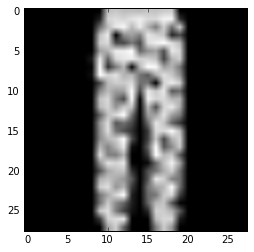

In [16]:
import random 
index = random.randint(1,10000)
image1 = x_test[index].reshape(28,28)
plt.imshow(image1,cmap='gray')
pred = fashion_model.predict(x_test[index].reshape(-1,28,28,1))
print("CNN predicts : ", map_output(np.argmax(pred)))